In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import scipy.signal
import scipy.io.wavfile
from scipy.fftpack import fft, fftshift,fftfreq,ifft
import pandas as pd
import soundfile as sf
import librosa
import cv2

<class 'numpy.int16'>


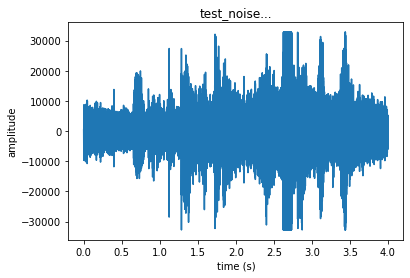

[  477 -3165  3632 ...  4005 -5102  2767]
[  477.         -1344.           314.66666667 ...  -118.19
  -156.52        -154.37      ]


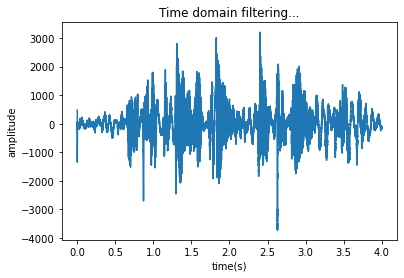

In [2]:
fs,signal=scipy.io.wavfile.read("test_noise.wav")


Time = np.linspace(0, len(signal) / fs, num=len(signal))
print(type(signal[0]))
plt.figure(1)
plt.title("test_noise...")
plt.plot(Time, signal)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.show()

data=pd.DataFrame(signal,columns=["input"])
###window size
n=100
output=data["input"].rolling(window=n,min_periods=1).mean()
print(signal)
print(output.values)
of=output.values
o=(output.values).astype(np.int16)
plt.figure(1)
plt.title("Time domain filtering...")
plt.plot(Time, output.values)
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()

scipy.io.wavfile.write("movingaverageoutput(floating).wav", fs, of)
scipy.io.wavfile.write("movingaverageoutput.wav", fs, o)

<ipython-input-5-8ba890866d79>:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  original = np.fromstring(original, "Int16")
<ipython-input-5-8ba890866d79>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  original = np.fromstring(original, "Int16")


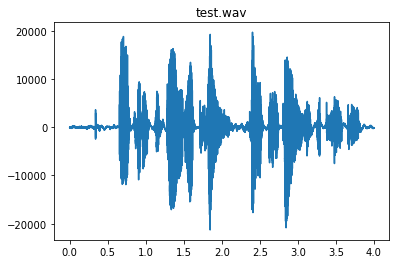

/home/saksham/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


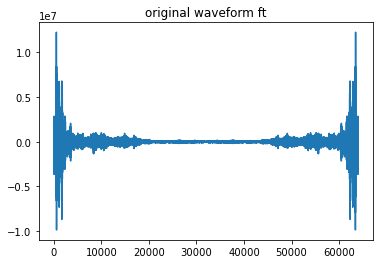

In [5]:
spf = wave.open("test.wav", "r")

# Extract Raw Audio from Wav File
original = spf.readframes(-1)
original = np.fromstring(original, "Int16")
ofs = spf.getframerate()

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(original) / ofs, num=len(original))

plt.figure(1)
plt.title("test.wav")
plt.plot(Time, original)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()
# xf=fftfreq(len(signal))
xf = np.linspace(0, ofs, num=len(original)//2)
# plt.plot(xf,fft(original)[:len(original)//2])
plt.title("original waveform ft")
plt.plot(fft(original))
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()

/home/saksham/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


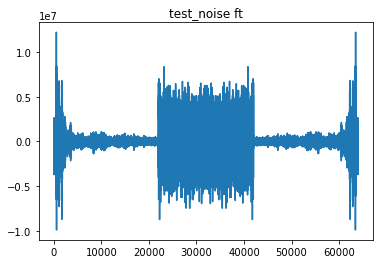

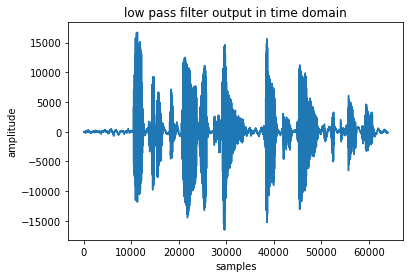

In [13]:
### transform to frequency signal
freq=fft(signal)
xf=fftfreq(len(signal))
plt.figure(1)
plt.title("test_noise ft")
plt.plot(freq)
plt.show()
sampling_freq=fs
order=5
cutoff_freq=1000
normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)
filtered_signal = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, signal)

plt.figure(1)
plt.title("low pass filter output in time domain")
plt.plot(filtered_signal)
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.show()

filtered_signal=filtered_signal.astype(np.int16)
scipy.io.wavfile.write("lowpassfilteroutput.wav", fs, filtered_signal)

/home/saksham/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


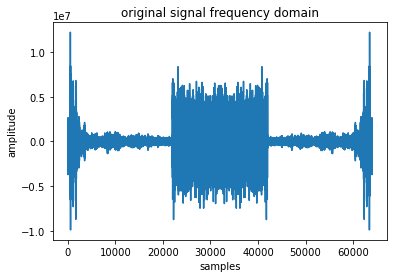

64000


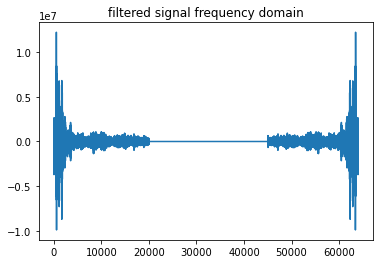

/home/saksham/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


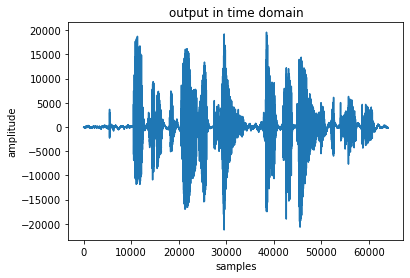

<ipython-input-3-885542104770>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  y=y.astype(np.int16)


In [3]:
freq=fft(signal)
# xf=np.linspace(0,fs,len(signal)//2)
plt.title("original signal frequency domain")
plt.plot(freq)
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.show()

# freq=np.abs(freq)
total_size=len(freq)
print(total_size)
new_freq=[]
for i in range(len(freq)):
    if(i<20000 or i>45000):
        new_freq.append(freq[i])
    else:
        new_freq.append(0)
        
plt.title("filtered signal frequency domain")        
plt.plot(new_freq)
plt.show()
y=ifft(new_freq)
plt.title("output in time domain")
plt.plot(y)
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.show()

y=y.astype(np.int16)
scipy.io.wavfile.write("Frequencydomainmanualoutput.wav",fs,y)


<class 'numpy.float32'>
(1025, 173)


/home/saksham/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


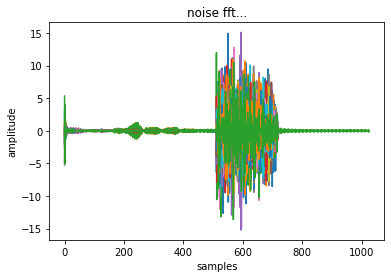

/home/saksham/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


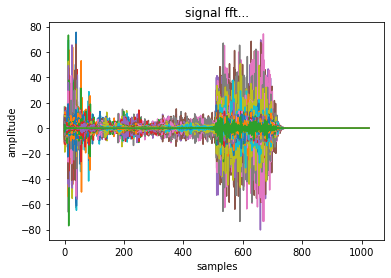

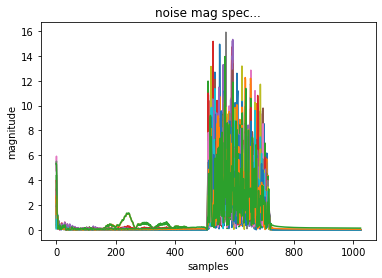

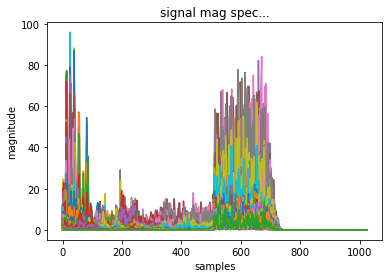

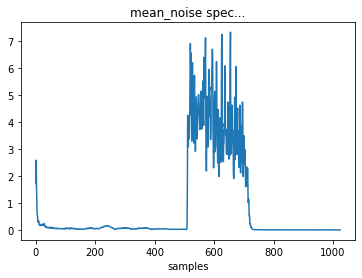

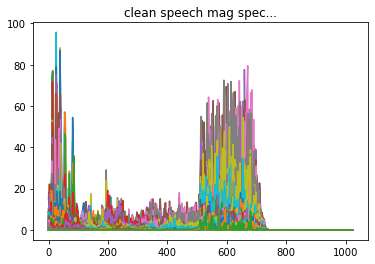

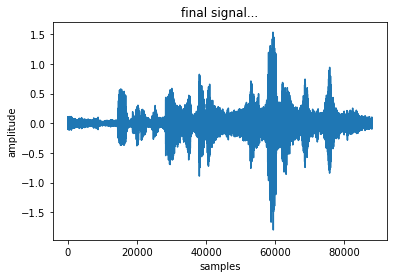

In [4]:
###spectral subtraction
noise_file="noise.wav"
nf = wave.open(noise_file, "r")

signal,fs =librosa.load("test_noise.wav")
print(type(signal[0]))
s= librosa.stft(signal)
print(s.shape)
mag_spec= np.abs(s)        
angle= np.angle(s)    
phase_spec=np.exp(1.0j* angle) 

noise,nfs=librosa.load(noise_file)

ns= librosa.stft(noise) 
nss= np.abs(ns)
mns= np.mean(nss,axis=1) 
mean_noise = mns
# print(mns.shape)
sa= mag_spec - mns.reshape((mns.shape[0],1))  
tmp=mns.reshape((mns.shape[0],1))
# print(tmp.shape)
sa = np.clip(sa, a_min=0.0, a_max=None)
sa0= sa * phase_spec
y= librosa.istft(sa0)
plt.figure(1)
plt.title("noise fft...")
plt.plot(ns)
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.show()
plt.figure(1)
plt.title("signal fft...")
plt.plot(s)
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.show()
plt.figure(1)
plt.title("noise mag spec...")
plt.plot(nss)
plt.xlabel("samples")
plt.ylabel("magnitude")
plt.show()
plt.figure(1)
plt.title("signal mag spec...")
plt.plot(mag_spec)
plt.xlabel("samples")
plt.ylabel("magnitude")
plt.show()
plt.figure(1)
plt.title("mean_noise spec...")
plt.plot(mean_noise)
plt.xlabel("samples")
plt.ylabel("")
plt.show()
plt.figure(1)
plt.title("clean speech mag spec...")
plt.plot(sa)
plt.show()

plt.figure(1)
plt.title("final signal...")
plt.plot(y)
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.show()
scipy.io.wavfile.write("spectralsuboutput.wav", fs, y)

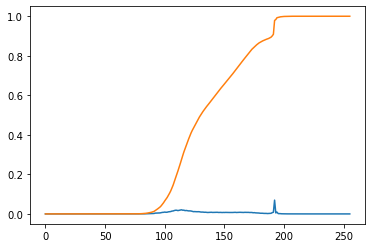

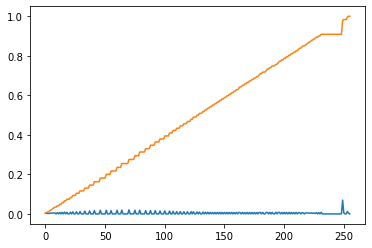

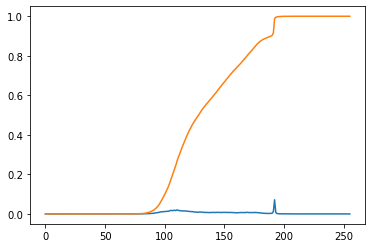

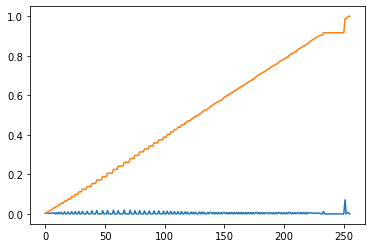

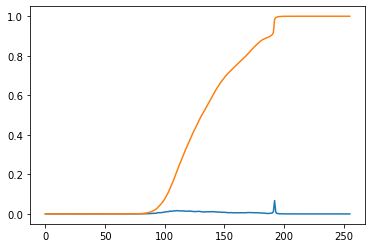

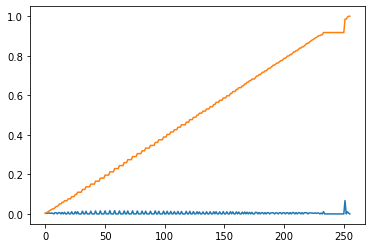

(194, 259, 3) (194, 259, 3)


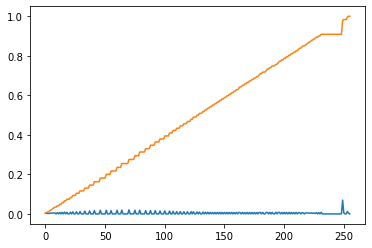

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Thur May 20 01:49:32 2021

@author: manavmehta
"""



def get_PDF_CDF(img):
    img_x = img.shape[0]
    img_y = img.shape[1]
    freq = [0]*(256)
    for row in img:
        for pixel in row:
            freq[int(pixel)] = freq[int(pixel)] + 1
        
    pdf = (np.array(freq))/(img_x*img_y) #divide by total number of pixels
    
    # first element as it is
    cdf = [pdf[0]]
    for i in range(1 , len(pdf)):
        cdf.append(cdf[i-1] + pdf[i])
    
    cdf = np.array(cdf)
    
    plt.plot(pdf)
    plt.plot(cdf)
    plt.show()# plotting the pdf & cdf for corresponding color

    return pdf,cdf


def equalize(img):

    eq_img = np.zeros(img.shape)
    pdf,cdf = get_PDF_CDF(img)
    
    # get the equalized (L-1)*cdf column
    # print("Shape = ", img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            eq_img[i][j] = 255 * (cdf[img[i][j]])
    get_PDF_CDF(eq_img)
    return eq_img


filename = "moon.jpg"
filename = "city.jpg"
img = cv2.imread(filename)
# print(img)
# print("Shape = ", img.shape) # (194, 259, 3)

# Separate out RGB channels -> equalize and unite them back
processed_img = np.array([equalize(img[:,:,0]) , equalize(img[:,:,1]) , equalize(img[:,:,2])])
# This gives appended rows so need to transpose

final = np.zeros(img.shape)

# reshaping -> taking the transpose to get the needed np shape for writing
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        final[i][j][0] = processed_img[0][i][j]
        final[i][j][1] = processed_img[1][i][j]       
        final[i][j][2] = processed_img[2][i][j]
# print(type(final),type(img))
print(final.shape,img.shape)
processed_img2 = np.array([equalize(final[:,:,0]) , equalize(final[:,:,1]) , equalize(final[:,:,2])])

cv2.imwrite('enhanced_'+filename , final)
cv2.imwrite('more_enhanced'+filename , processed_img2)
